In [1]:
import numpy as np
from sampler import Sampler, load_from_files
from s_manager import SManager
import hickle
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
sampler = Sampler(seed=99, niter=10000, burn_in=10, best_type="mean", random_the_long_way=True)
sampler.load_sim(4, 16, 16)
print("Likelihood before run", sampler.vis_true.get_unnormalized_likelihood(unity_N=True, over_all=True))   

gauss = lambda x, y: np.exp(-0.5*(x**2+y**2)/.005)

sm = SManager(sampler.vis_redcal.ntime, sampler.vis_redcal.nfreq, sampler.vis_redcal.nant)
sm.generate_S(gauss, modes=2, ignore_threshold=0, zoom_from=(64, 64), scale=2)    # Contains all times/freqs

# V prior
V_mean = sampler.vis_redcal.V_model
Cv_diag = np.full(V_mean.shape[2]*2, 2)

sampler.set_S_and_V_prior(sm, V_mean, Cv_diag)

sampler.run()

print("Likelihood after run", sampler.vis_true.get_unnormalized_likelihood(unity_N=True, over_all=True))   


Likelihood before run 1.0
112 modes selected out of 1792 (6.0%)
Running sampling
Time accumulated: 0. Memory: 0.16 GB
Iter 0
Time accumulated: 0.17 s, 0.0 m, 0.0 h. Time since last report: 0.17 s, 0.0 m, 0.0 h.
Memory: 0.16 GB. Memory change since last report: 0.0 GB.
Iter 1000
Time accumulated: 158.16 s, 2.64 m, 0.04 h. Time since last report: 158.0 s, 2.63 m, 0.04 h.
Memory: 0.18 GB. Memory change since last report: 0.02 GB.
Iter 2000
Time accumulated: 317.67 s, 5.29 m, 0.09 h. Time since last report: 159.5 s, 2.66 m, 0.04 h.
Memory: 0.2 GB. Memory change since last report: 0.03 GB.
Iter 3000
Time accumulated: 478.28 s, 7.97 m, 0.13 h. Time since last report: 160.62 s, 2.68 m, 0.04 h.
Memory: 0.23 GB. Memory change since last report: 0.03 GB.
Iter 4000
Time accumulated: 636.17 s, 10.6 m, 0.18 h. Time since last report: 157.89 s, 2.63 m, 0.04 h.
Memory: 0.26 GB. Memory change since last report: 0.03 GB.
Iter 5000
Time accumulated: 794.21 s, 13.24 m, 0.22 h. Time since last report: 158

Plot results


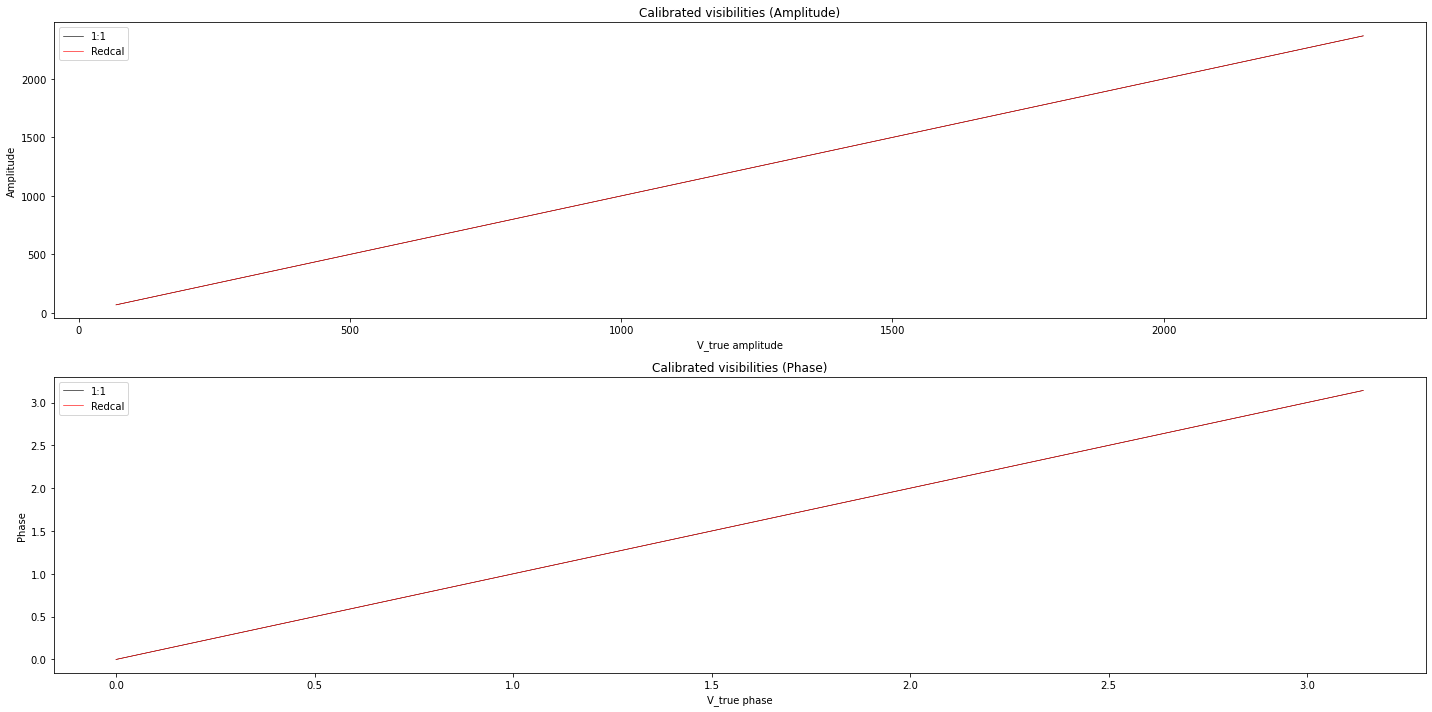

In [3]:
sampler.plot_results(time=0, freq=0)

Plot marginals


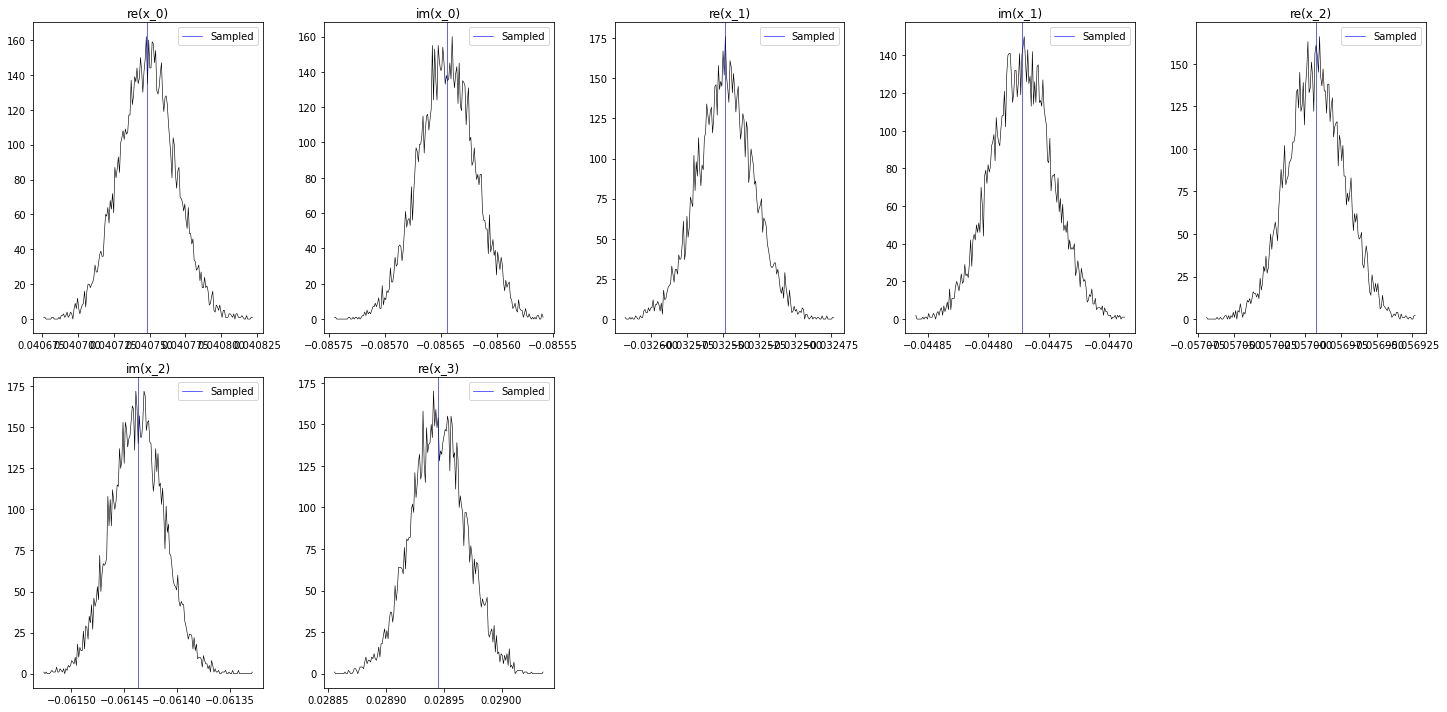

In [4]:
sampler.plot_marginals("x", 5, time=0, freq=0, which=[ "Sampled" ])

Plot marginals


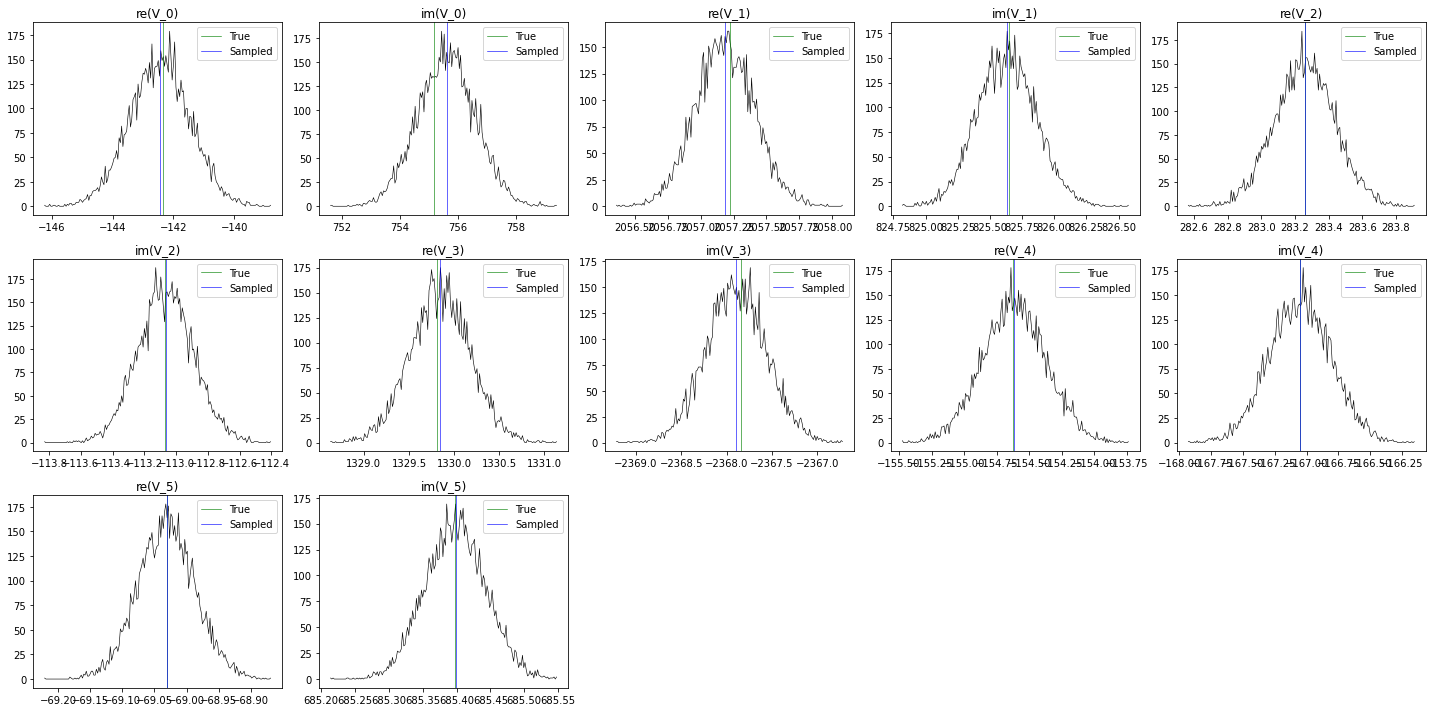

In [5]:
sampler.plot_marginals("V", 5, time=0, freq=0, which=[ "True", "Sampled" ])


In [6]:
#sampler.plot_corner(["x", "V"], time=0, freq=0)

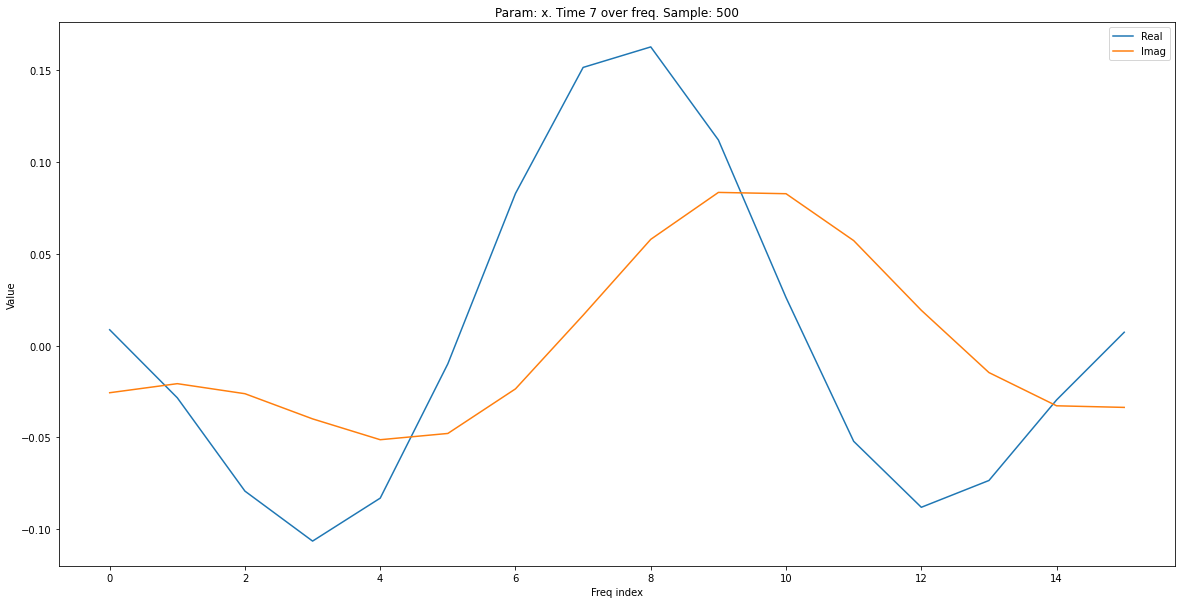

In [7]:
sampler.plot_one_over_time_freq("x", 500, 2, time=7)

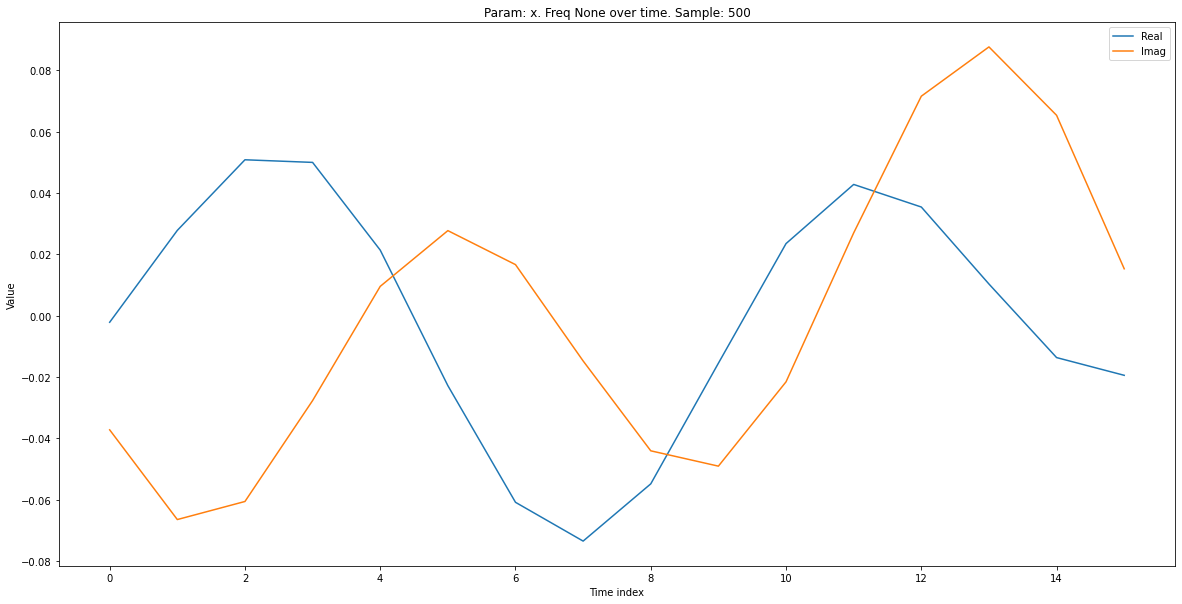

In [8]:
sampler.plot_one_over_time_freq("x", 500, 2, freq=13)

Plot corner
x values: 7, V values: 12


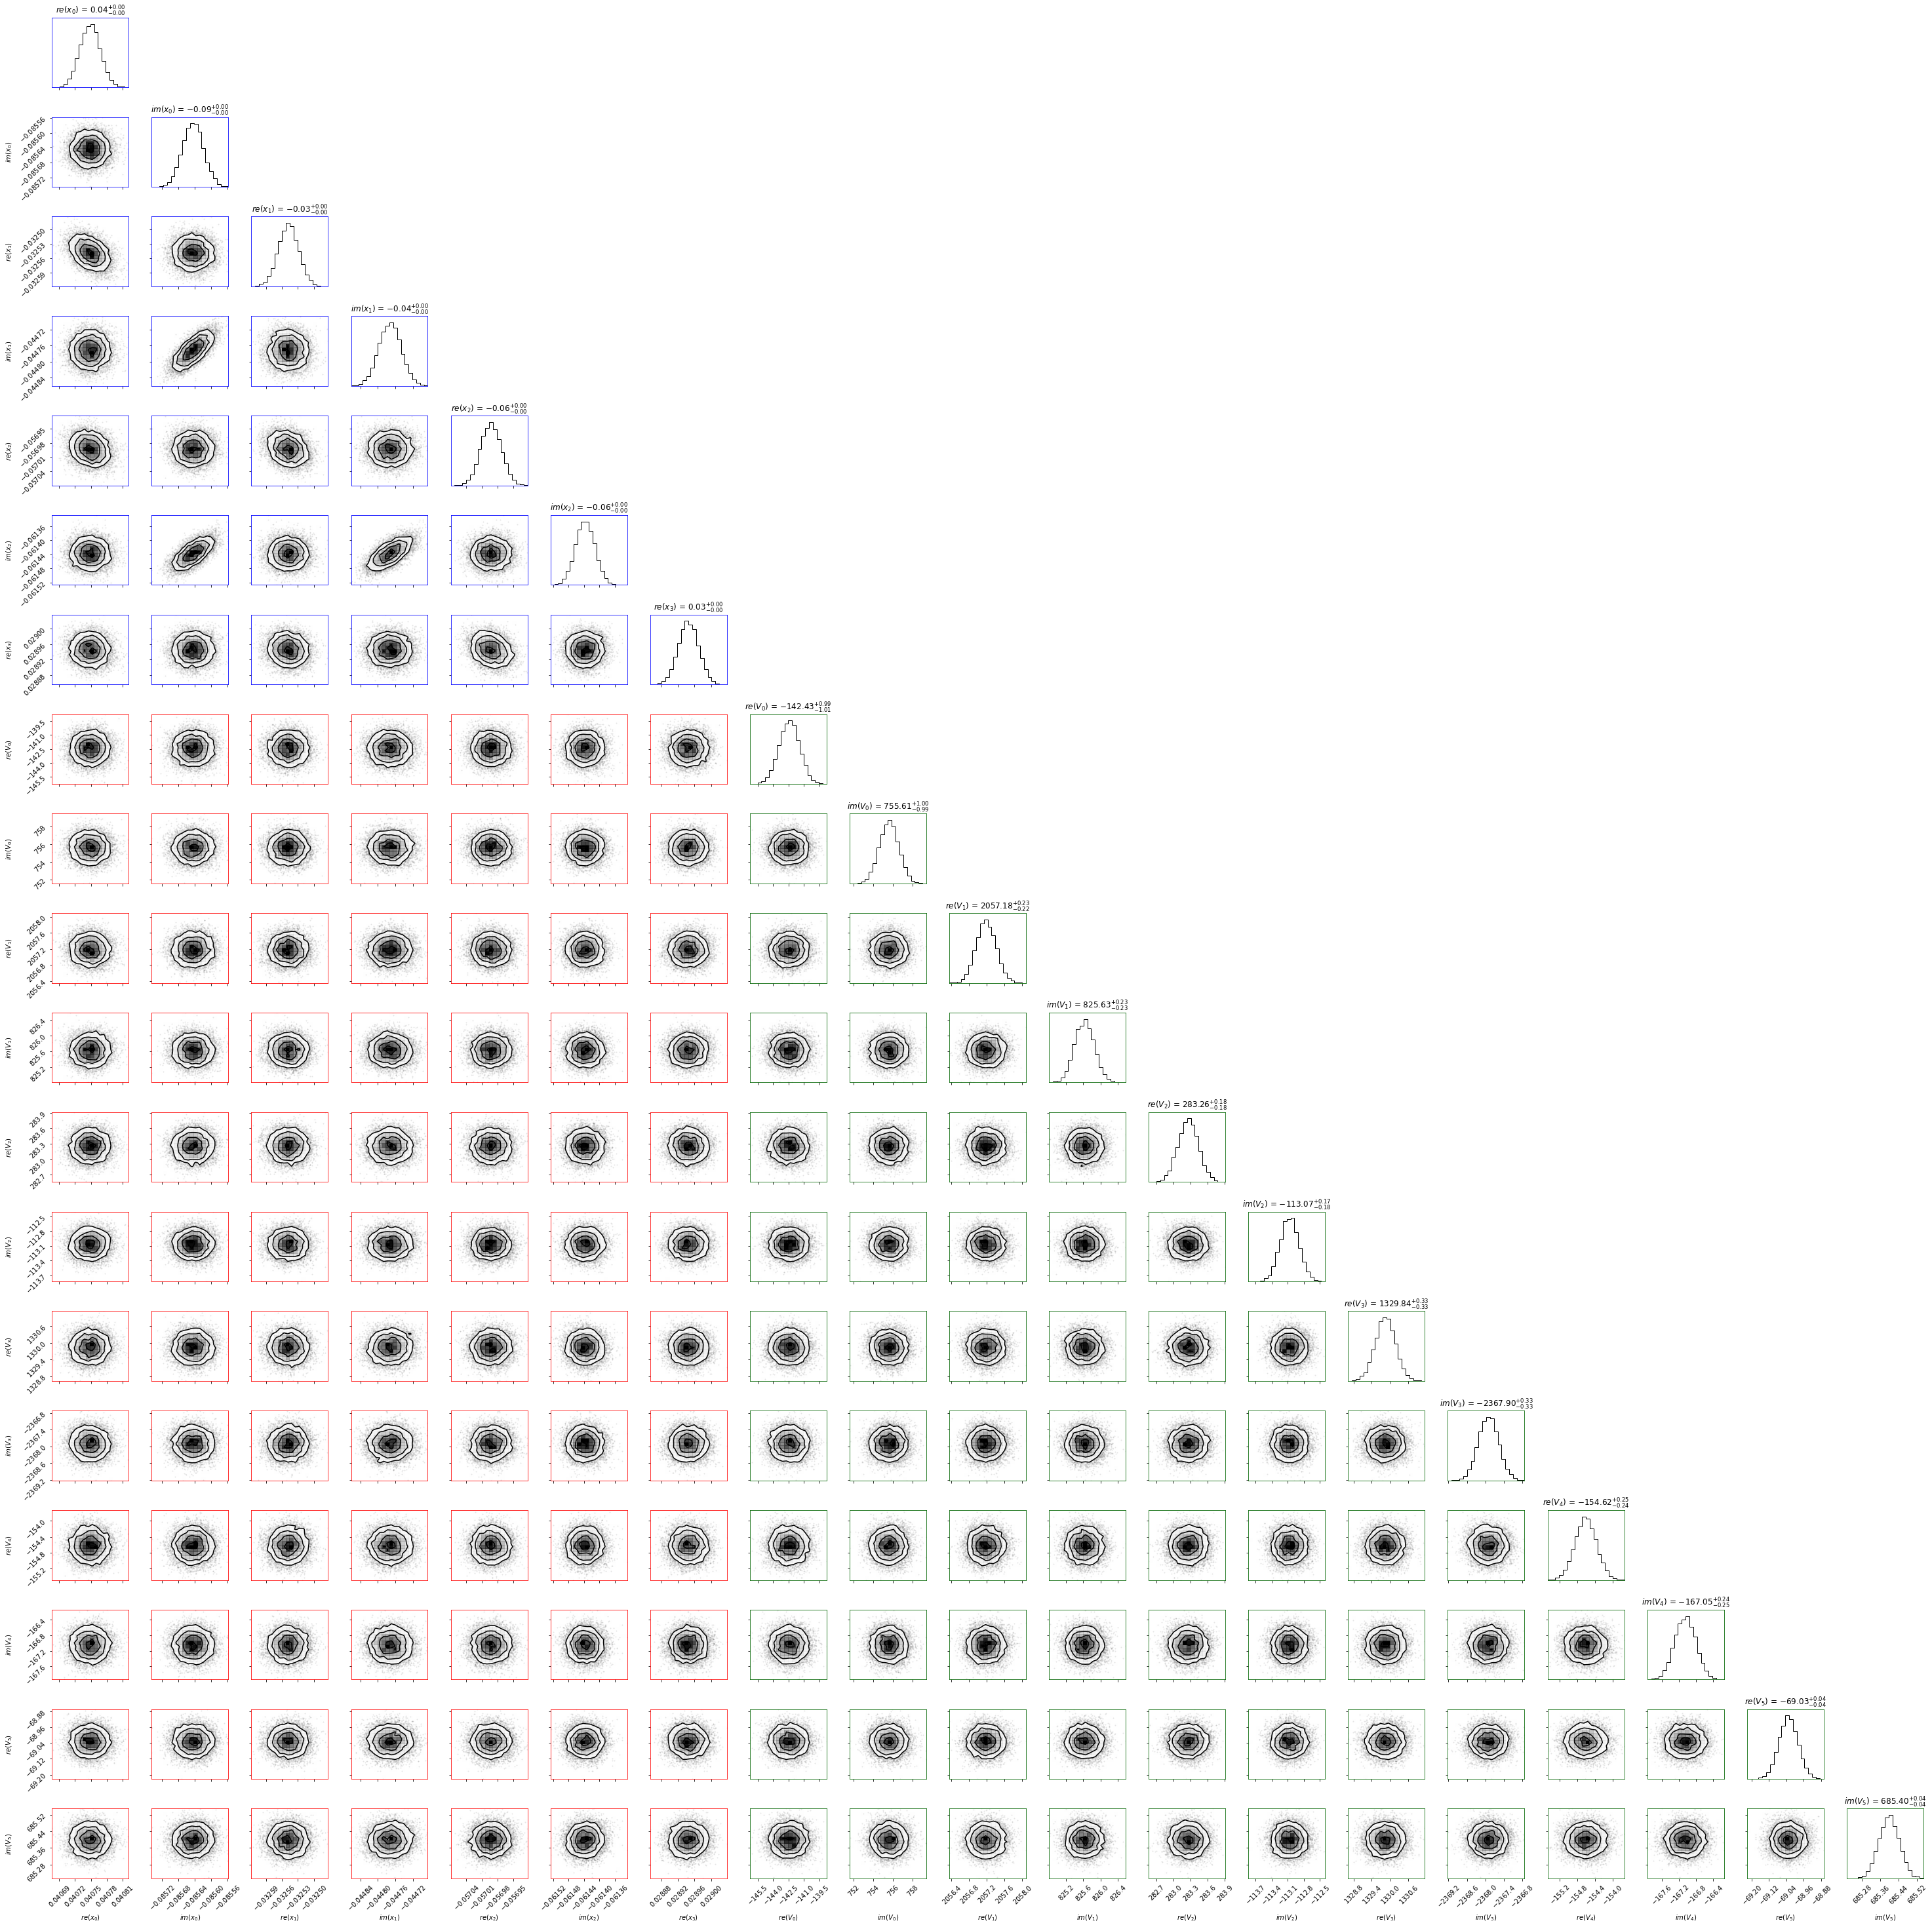

In [11]:
sampler.plot_corner(["x", "V"], time=0, freq=0)